# Ejercicios del libro de ML

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [2]:
boston = pd.read_csv("../db/Boston.csv")
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [3]:
boston.head(4)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4


In [4]:
# hacer una regresión simple usando lstat como predictor
X = pd.DataFrame({"intercepto": np.ones(boston.shape[0]),
                 "lstat": boston["lstat"]})

X.head(4)

,intercepto,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [5]:
y = boston["medv"]
modelo = sm.OLS(y, X)
results = modelo.fit()
summarize(results)

,coef,std err,t,P>|t|
intercepto,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           5.08e-88
Time:                        16:32:37   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercepto    34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Uso de Pipelines

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import itertools
from statsmodels.stats.anova import anova_lm

In [8]:
# ahora hacemos un modelo con dos variables: lstat y age
X = boston[["lstat", "age"]]
y = boston["medv"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir pipeline
pipeline = Pipeline([
    ("poli", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ("escala", StandardScaler()),
    ("modelo", LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Evaluar modelo
mse = mean_squared_error(y_test, y_pred)
nombres = pipeline.named_steps["poli"].get_feature_names_out(X.columns)

print(f"MSE: {mse}")
print(nombres)
print(f"Coeficientes: {pipeline.named_steps["modelo"].coef_}")
print(f"Intercepto: {pipeline.named_steps["modelo"].intercept_}")

MSE: 32.840664706774085
['lstat' 'age' 'lstat age']
Coeficientes: [-8.73942902  0.6229657   1.60157816]
Intercepto: 22.79653465346534


## Ejercicios

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from statsmodels.formula.api import ols

In [10]:
autos = pd.read_csv("../db/Auto.csv")
autos.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [11]:
# Hacer una regresión lineal simple para predecir los caballos de fuerza según las millas por galón
X = autos[["mpg"]]
y = autos["horsepower"]

pipeline = Pipeline([
    ("modelo", LinearRegression(fit_intercept=True))
])

pipeline.fit(X, y)

intercepto = pipeline.named_steps["modelo"].intercept_
coeficientes = pipeline.named_steps["modelo"].coef_

print(f"y={round(coeficientes[0], 2)}x + {round(intercepto)}")

y=-3.84x + 194


In [12]:
modelo = pipeline.named_steps["modelo"]
r2 = modelo.score(X, y)
r2

0.605948257889435

In [13]:
modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             horsepower   R-squared (uncentered):                   0.649
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                              723.7
Date:                Mon, 16 Dec 2024   Prob (F-statistic):                    5.67e-91
Time:                        16:32:37   Log-Likelihood:                         -2198.2
No. Observations:                 392   AIC:                                      4398.
Df Residuals:                     391   BIC:                                      4402.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mpg            3.6302      0.135     26.901      0.000       3.365       3.895
==============================================================================
Omnibus:                       16.614   Durbin-Watson:                   0.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.430
Skew:                           0.460   Prob(JB):                     0.000271
Kurtosis:                       2.601   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Mariajose\AppData\Local\Temp\ipykernel_14860\1822502789.py:18: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


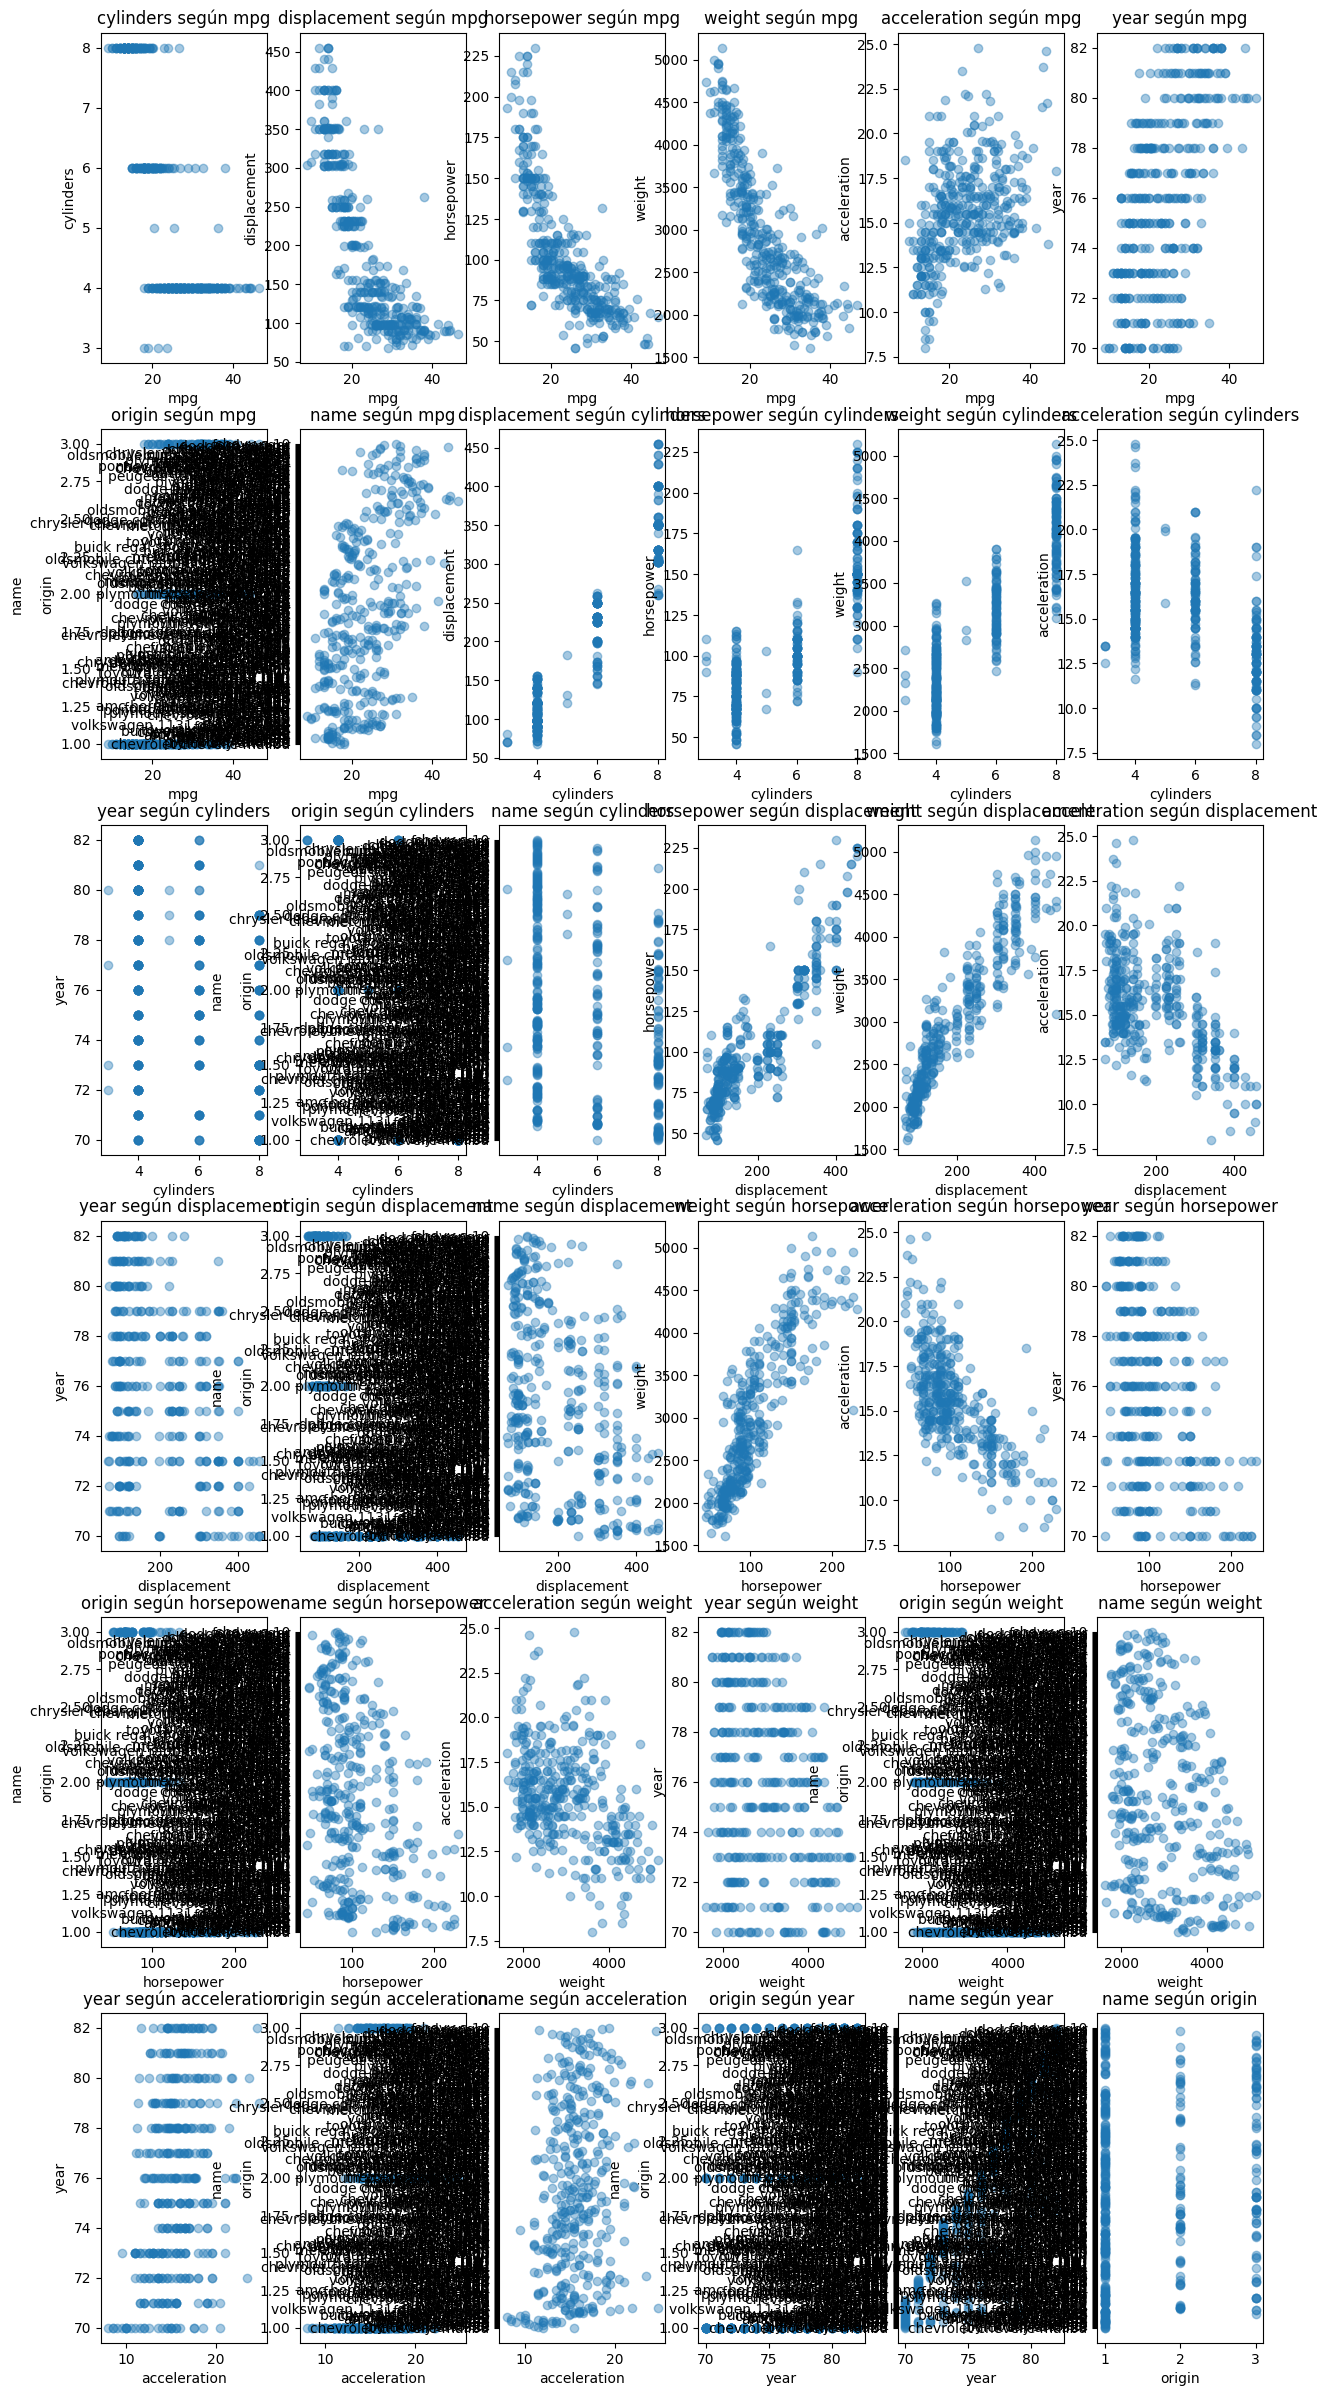

In [14]:
# Crear el diagrama de dispersión para todas las combinaciones posibles
columnas = autos.columns.tolist()
combinaciones = list(itertools.combinations(columnas, 2))

n_subpots = len(combinaciones)
n_cols = 6
n_rows = int(len(combinaciones) / n_cols) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for idx, (col1, col2) in enumerate(combinaciones):
    axes[idx].scatter(autos[col1], autos[col2], alpha=0.4)
    axes[idx].set_xlabel(col1)
    axes[idx].set_ylabel(col2)
    axes[idx].set_title(f"{col2} según {col1}")

plt.tight_layout()
plt.show()

In [15]:
# Crear matriz de correlaciones
correlaciones = autos.drop(columns=["name"]).corr()
correlaciones

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [16]:
# hacer una regresión tomando todas las variables como predictoras
predictores = ""
for col in autos.columns.tolist():
    if col != "name" and col != "mpg":
        predictores += f"+ {col}"
model = ols(f"mpg ~ {predictores}", data=autos).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          2.04e-139
Time:                        16:32:51   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
anova = anova_lm(model)

In [19]:
anova = anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
cylinders,1.0,14403.083079,14403.083079,1300.683788,2.319511e-125
displacement,1.0,1073.344025,1073.344025,96.929329,1.530906e-20
horsepower,1.0,403.408069,403.408069,36.430140,3.731128e-09
weight,1.0,975.724953,975.724953,88.113748,5.544461e-19
acceleration,1.0,0.966071,0.966071,0.087242,7.678728e-01
year,1.0,2419.120249,2419.120249,218.460900,1.875281e-39
origin,1.0,291.134494,291.134494,26.291171,4.665681e-07
Residual,384.0,4252.212530,11.073470,NaN,NaN


## Evaluar modelo

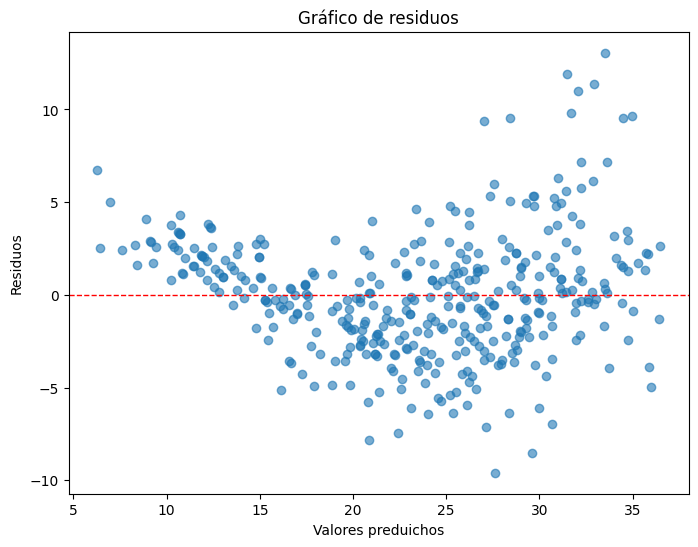

In [23]:
# Hacer gráfico de residuos
residuos = model.resid
valores_predichos = model.fittedvalues

plt.figure(figsize=(8,6))
plt.scatter(valores_predichos, residuos, alpha=0.6)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Gráfico de residuos")
plt.xlabel("Valores preduichos")
plt.ylabel("Residuos")
plt.show()

Vemos que sí hay una tendencia en la dispersión de los puntos, por lo que podemos concluir que el modelo no está bien ajustado y que, posiblemente, no existe una relación lineal entre las variables predictoras y la variable objetivo. También se pueden observar atípicos. 

## Puntos de apalancamiento

In [24]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag
threshold = 2 * (len(model.params) / len(autos))

# identificar puntos de alto apalancamiento
high_leverage_points = np.where(leverage > threshold)[0]

print(f"Umbral de apalancamiento: {threshold}")
print(f"Puntos de alto apalancamiento: {high_leverage_points}")
print(f"Valores de apalancamiento: {leverage[high_leverage_points]}")

Umbral de apalancamiento: 0.04081632653061224
Puntos de alto apalancamiento: [  6   7   8  12  13  25  26  27  28  93  94 115 209 297 298 359 388]
Valores de apalancamiento: [0.05732775 0.0469958  0.06244917 0.0453853  0.18991289 0.05550071
 0.06736993 0.06667349 0.08954137 0.04221313 0.05330274 0.05703622
 0.04082394 0.04963809 0.05795377 0.05047094 0.04917182]


In [25]:
# Evaluar puntos de apalancamiento

# Ver si son datos atípicos
autos.iloc[high_leverage_points]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
12,15.0,8,400.0,150,3761,9.5,70,1,chevrolet monte carlo
13,14.0,8,455.0,225,3086,10.0,70,1,buick estate wagon (sw)
25,10.0,8,360.0,215,4615,14.0,70,1,ford f250
26,10.0,8,307.0,200,4376,15.0,70,1,chevy c20
27,11.0,8,318.0,210,4382,13.5,70,1,dodge d200
28,9.0,8,304.0,193,4732,18.5,70,1,hi 1200d
93,13.0,8,440.0,215,4735,11.0,73,1,chrysler new yorker brougham


In [26]:
autos.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Ahora evaluamos qué tanto impacto tienen en el modelo corriendolo pero ahora quitando estos puntos.